In [25]:
import pandas as pd
import numpy as np
# df = pd.read_csv("./original_gaussian_table.csv")
df = pd.read_csv("./wandb_results_week16.csv")
df.replace('undefined', np.nan, inplace=True)
df

,dataset_name,groupKeys,id,model_name,name,noise_std,test_best_historical_mse,test_best_historical_mse_Target_Bitcoin,test_best_historical_mse_Target_Ethereum
0,crypto,group-inrplay_deeptime_crypto_in105_out15_nois...,gn8ocqw8,inrplay_deeptime,inrplay_deeptime_crypto_in105_out15_noise_lapl...,1,0.287270,0.28726976057176434,NaN
1,crypto,group-inrplay_deeptime_crypto_in105_out15_nois...,dp7s5r8j,inrplay_deeptime,inrplay_deeptime_crypto_in105_out15_noise_lapl...,1,0.384592,NaN,0.38459158469595006
2,crypto,group-inrplay_deeptime_crypto_in105_out15_nois...,rgjd6uld,inrplay_deeptime,inrplay_deeptime_crypto_in105_out15_noise_lapl...,0.5,0.258762,0.2587620069931905,NaN
3,crypto,group-inrplay_deeptime_crypto_in105_out15_nois...,iq6d5nxj,inrplay_deeptime,inrplay_deeptime_crypto_in105_out15_noise_lapl...,0.5,0.344114,NaN,0.34411427694081886
4,crypto,group-inrplay_deeptime_crypto_in105_out15_nois...,boambl12,inrplay_deeptime,inrplay_deeptime_crypto_in105_out15_noise_lapl...,0,0.214385,0.21438486162720197,NaN
...,...,...,...,...,...,...,...,...,...
294,exchange_rate,group-nbeats_exchange_rate_in288_out96_noise_l...,9bic29r2,nbeats,nbeats_exchange_rate_in288_out96_noise_laplace...,0,0.342450,NaN,NaN
295,traffic,group-nbeats_traffic_in672_out96_noise_laplace...,lz909xg8,nbeats,nbeats_traffic_in672_out96_noise_laplace_std0_...,0,0.146604,NaN,NaN
296,traffic,group-deeptime_traffic_in672_out96_noise_lapla...,pzojf8ll,deeptime,deeptime_traffic_in672_out96_noise_laplace_std...,0,0.116083,NaN,NaN
297,etth2,group-deeptime_etth2_in288_out96_noise_laplace...,t9n0dg4o,deeptime,deeptime_etth2_in288_out96_noise_laplace_std0_...,0,0.130689,NaN,NaN


In [26]:
dataset_names = ['etth2','traffic','exchange_rate','crypto_Bitcoin','crypto_Ether']
model_names = ['naive_martingle', 'nbeats', 'deeptime', 'dictregul', 'maml_deeptime', 'omp_deeptime', 'mixture_experts_deeptime', 'inrplay_deeptime']

In [27]:
dataset_names = list(np.array(dataset_names).repeat(3))
dataset_names = [name+f"_std{i%3*0.5}" for i, name in enumerate(dataset_names)]
model_names = list(np.array(model_names).repeat(2))
for i, name in enumerate(model_names):
    if i%2==0:
        model_names[i] = name
    else:
        model_names[i] = name+"_std"
# model_names = [name+"_std" for i, name in enumerate(model_names) if i%2==1]
dataset_names, model_names

(['etth2_std0.0',
  'etth2_std0.5',
  'etth2_std1.0',
  'traffic_std0.0',
  'traffic_std0.5',
  'traffic_std1.0',
  'exchange_rate_std0.0',
  'exchange_rate_std0.5',
  'exchange_rate_std1.0',
  'crypto_Bitcoin_std0.0',
  'crypto_Bitcoin_std0.5',
  'crypto_Bitcoin_std1.0',
  'crypto_Ether_std0.0',
  'crypto_Ether_std0.5',
  'crypto_Ether_std1.0'],
 ['naive_martingle',
  'naive_martingle_std',
  'nbeats',
  'nbeats_std',
  'deeptime',
  'deeptime_std',
  'dictregul',
  'dictregul_std',
  'maml_deeptime',
  'maml_deeptime_std',
  'omp_deeptime',
  'omp_deeptime_std',
  'mixture_experts_deeptime',
  'mixture_experts_deeptime_std',
  'inrplay_deeptime',
  'inrplay_deeptime_std'])

In [28]:
table = pd.DataFrame(data=None, index=model_names, columns=dataset_names, dtype=None, copy=None)


In [29]:
# for dataset in dataset_names:
#     for model in model_names:
#         table.loc[model, dataset] = [np.nan,np.nan,np.nan]

In [30]:
# table['deeptime']
# table.loc['deeptime', 'etth2'] = 5
table

,etth2_std0.0,etth2_std0.5,etth2_std1.0,traffic_std0.0,traffic_std0.5,traffic_std1.0,exchange_rate_std0.0,exchange_rate_std0.5,exchange_rate_std1.0,crypto_Bitcoin_std0.0,crypto_Bitcoin_std0.5,crypto_Bitcoin_std1.0,crypto_Ether_std0.0,crypto_Ether_std0.5,crypto_Ether_std1.0
naive_martingle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
naive_martingle_std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nbeats,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nbeats_std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deeptime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deeptime_std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dictregul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dictregul_std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maml_deeptime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maml_deeptime_std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
group_key = df["groupKeys"]
unique_groupkeys = group_key[~group_key.str.contains("dict_0.0")].unique()

In [32]:
# precision = 6
# for groupkey in unique_groupkeys:
#     df_group = df[df["groupKeys"] == groupkey]
#     noise = 0 if 'std0_' in groupkey else 1 if 'std0.5' in groupkey else 2
#     if 'crypto' in groupkey:
#         group_bitcoin = df_group["test_best_historical_mse_Target_Bitcoin"]
#         group_ether = df_group["test_best_historical_mse_Target_Ethereum"]
#         group_mean_bitcoin = group_bitcoin[group_bitcoin.notna()].astype(float).mean()
#         group_mean_ether = group_ether[group_ether.notna()].astype(float).mean()
#         group_std_bitcoin = group_bitcoin[group_bitcoin.notna()].astype(float).std()
#         group_std_ether = group_ether[group_ether.notna()].astype(float).std()
#         for model_name in model_names:
#             if model_name == df_group['model_name'].values[0]:
#                 table.loc[model_name, 'crypto_Bitcoin'][noise] = str(group_mean_bitcoin)[:precision] + ' (' + str(group_std_bitcoin)[:precision] + ')'
#                 table.loc[model_name, 'crypto_Ether'][noise] = str(group_mean_ether)[:precision] + ' (' + str(group_std_ether)[:precision] + ')'
#         if 'naive_martingle' in groupkey:
#                 table.loc['naive_martingle', 'crypto_Bitcoin'][noise] = str(group_mean_bitcoin)[:precision] + ' (' + str(group_std_bitcoin)[:precision] + ')'
#                 table.loc['naive_martingle', 'crypto_Ether'][noise] = str(group_mean_ether)[:precision] + ' (' + str(group_std_ether)[:precision] + ')'
#     else: 
#         group_mean = df_group["test_best_historical_mse"].mean()
#         group_std = df_group["test_best_historical_mse"].std()
#         for model_name in model_names:
#             if model_name == df_group['model_name'].values[0]:                   
#                 for dataset_name in dataset_names:
#                     if dataset_name == df_group['dataset_name'].values[0]:
#                         table.loc[model_name, dataset_name][noise] = str(group_mean)[:precision] + ' (' + str(group_std)[:precision] + ')'
                        
#         if 'naive_martingle' in groupkey:
#             for dataset_name in dataset_names:
#                 if dataset_name in groupkey:
#                     table.loc['naive_martingle', dataset_name][noise] = str(group_mean)[:precision] + ' (' + str(group_std)[:precision] + ')'

In [33]:
precision = 6
metric = 'test_best_historical_mse'
for groupkey in unique_groupkeys:
    df_group = df[df["groupKeys"] == groupkey]
    noise = '_std0.0' if 'std0_' in groupkey else '_std0.5' if 'std0.5' in groupkey else '_std1.0'
    if 'crypto' in groupkey:
        group_bitcoin = df_group[f"{metric}_Target_Bitcoin"]
        group_ether = df_group[f"{metric}_Target_Ethereum"]
        group_mean_bitcoin = group_bitcoin[group_bitcoin.notna()].astype(float).mean()
        group_mean_ether = group_ether[group_ether.notna()].astype(float).mean()
        group_std_bitcoin = group_bitcoin[group_bitcoin.notna()].astype(float).std()
        group_std_ether = group_ether[group_ether.notna()].astype(float).std()
        for model_name in model_names:
            if model_name == df_group['model_name'].values[0]:
                if ~np.isnan(group_mean_bitcoin):
                    table.loc[model_name, 'crypto_Bitcoin'+noise] = str(group_mean_bitcoin)[:precision]
                    table.loc[model_name+'_std', 'crypto_Bitcoin'+noise] = str(group_std_bitcoin)[:precision]
                if ~np.isnan(group_mean_ether):
                    table.loc[model_name, 'crypto_Ether'+noise] = str(group_mean_ether)[:precision]
                    table.loc[model_name+'_std', 'crypto_Ether'+noise] = str(group_std_ether)[:precision] 
        if 'naive_martingle' in groupkey:
                table.loc['naive_martingle', 'crypto_Bitcoin'+noise] = str(group_mean_bitcoin)[:precision] 
                table.loc['naive_martingle_std', 'crypto_Bitcoin'+noise] = str(group_std_bitcoin)[:precision]
                table.loc['naive_martingle', 'crypto_Ether'+noise] = str(group_mean_ether)[:precision]
                table.loc['naive_martingle_std', 'crypto_Ether'+noise] =   str(group_std_ether)[:precision] 
    else: 
        group_mean = df_group[metric].astype(float).mean()
        group_std = df_group[metric].astype(float).std()
        for model_name in model_names:
            if model_name == df_group['model_name'].values[0]:                   
                for dataset_name in dataset_names:
                    if dataset_name == df_group['dataset_name'].values[0] + noise:
                        table.loc[model_name, dataset_name] = str(group_mean)[:precision]
                        table.loc[model_name+'_std', dataset_name] = str(group_std)[:precision]
                        
        if 'naive_martingle' in groupkey:
            for dataset_name in dataset_names:
                if dataset_name.replace(noise, '') in groupkey:
                    table.loc['naive_martingle', dataset_name] = str(group_mean)[:precision]
                    table.loc['naive_martingle_std', dataset_name] = str(group_std)[:precision]

In [34]:
table

,etth2_std0.0,etth2_std0.5,etth2_std1.0,traffic_std0.0,traffic_std0.5,traffic_std1.0,exchange_rate_std0.0,exchange_rate_std0.5,exchange_rate_std1.0,crypto_Bitcoin_std0.0,crypto_Bitcoin_std0.5,crypto_Bitcoin_std1.0,crypto_Ether_std0.0,crypto_Ether_std0.5,crypto_Ether_std1.0
naive_martingle,0.2955,0.5452,1.2980,3.6277,3.8898,4.6584,0.0874,0.3377,1.0890,0.3657,0.6203,1.3795,0.5080,0.7552,1.4981
naive_martingle_std,0.0,0.0180,0.0695,5.4389,0.0155,0.0520,nan,0.0220,0.0939,0.0,0.0016,0.0044,0.0,0.0011,0.0060
nbeats,0.1729,0.1871,0.2132,0.1456,0.1947,0.2981,0.4741,0.3292,0.3260,0.2036,0.2466,0.2753,0.2989,0.3532,0.3931
nbeats_std,0.0425,0.0238,0.0134,0.0064,0.0106,0.0173,0.2234,0.1467,0.0207,0.0016,0.0030,0.0046,0.0042,0.0034,0.0011
deeptime,0.1289,0.1409,0.1669,0.1166,0.1346,0.1700,0.0869,0.1127,0.1461,0.1951,0.2585,0.2915,0.2777,0.3504,0.3949
deeptime_std,0.0015,0.0024,0.0034,0.0011,0.0028,0.0090,0.0001,0.0109,0.0182,0.0008,0.0010,0.0014,0.0014,0.0022,0.0042
dictregul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dictregul_std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maml_deeptime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maml_deeptime_std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
table.to_csv('table.csv')

## break

In [1]:
import pandas as pd
import numpy as np
# df = pd.read_csv("./original_gaussian_table.csv")
df = pd.read_csv("./chunk_experiment.csv")
df.replace('undefined', np.nan, inplace=True)


In [2]:
df['test_best_historical_mse'] = df['test_best_historical_mse'].astype(float)

In [3]:
chunk_exp_df = df[df['test_best_historical_mse'].notna()].groupby(['chunk_number', 'dict_reg_coef'])
chunk_exp_df_mean = chunk_exp_df.mean().rename(columns={'test_best_historical_mse': 'mse_mean'})
chunk_exp_df_std = chunk_exp_df.std().rename(columns={'test_best_historical_mse': 'mse_std'})
chunk_exp_mean_std = pd.concat([chunk_exp_df_mean,chunk_exp_df_std], axis=1)
chunk_exp_mean_std


/tmp/ipykernel_1237671/3183162452.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chunk_exp_df_mean = chunk_exp_df.mean().rename(columns={'test_best_historical_mse': 'mse_mean'})
/tmp/ipykernel_1237671/3183162452.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chunk_exp_df_std = chunk_exp_df.std().rename(columns={'test_best_historical_mse': 'mse_std'})


mse_mean   mse_std
chunk_number dict_reg_coef                    
0            0.00           0.195311  0.000218
             0.01           0.202259  0.000357
1            0.00           2.553114  0.012455
             0.01           2.644739  0.018631
2            0.00           1.078636  0.003198
             0.01           1.091518  0.017174
3            0.00           0.326432  0.000618
             0.01           0.329677  0.001922
4            0.00           0.383870  0.002126
             0.01           0.400679  0.005097
5            0.00           0.927269  0.010995
             0.01           0.946011  0.005943
6            0.00           0.944310  0.006840
             0.01           0.992005  0.016641
7            0.00           1.405213  0.001762
             0.01           1.448414  0.007643
8            0.00           1.023486  0.002199
             0.01           1.043880  0.002604
9            0.00           0.300409  0.002866
             0.01           0.304553  0.001312

In [4]:
chunk_exp_mean_std.unstack(level=1)


mse_mean             mse_std          
dict_reg_coef      0.00      0.01      0.00      0.01
chunk_number                                         
0              0.195311  0.202259  0.000218  0.000357
1              2.553114  2.644739  0.012455  0.018631
2              1.078636  1.091518  0.003198  0.017174
3              0.326432  0.329677  0.000618  0.001922
4              0.383870  0.400679  0.002126  0.005097
5              0.927269  0.946011  0.010995  0.005943
6              0.944310  0.992005  0.006840  0.016641
7              1.405213  1.448414  0.001762  0.007643
8              1.023486  1.043880  0.002199  0.002604
9              0.300409  0.304553  0.002866  0.001312

<Axes: xlabel='chunk_number'>

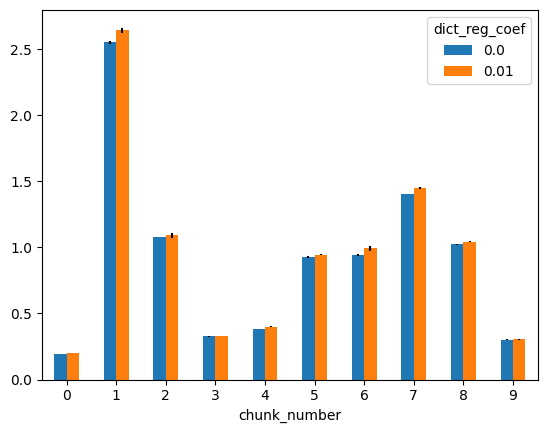

In [5]:
chunk_exp_mean_std.unstack(level=1).plot.bar(y='mse_mean', yerr='mse_std', rot=0)